In [12]:
from sklearn import feature_selection as fs
score_func = [1,2,3,4,5,6,7,8,9,10]
k = 10
fs.SelectKBest(score_func, k, 1) 

TypeError: SelectKBest.__init__() takes from 1 to 2 positional arguments but 4 were given

### tree - DecisionTreeClassifier  

In [9]:
from sklearn.tree import DecisionTreeClassifier  
X_train = [
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],
    [1,2,3,4],
]
y_train = [2,3,4,5]
dclf = DecisionTreeClassifier(max_depth=5) 
dclf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [8]:
X_test = [
    [2,3,4,5],
    [3,4,5,6],
]
y_pred = dclf.predict(X_test) 
print(y_pred)
y_prob = dclf.predict_proba(X_test)
print(y_prob)

[2 2]
[[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]


## 特征工程

### 1 特征抽取

In [21]:
from sklearn.feature_extraction import DictVectorizer # onehot编码
data = [
    {'name' : '张三', 'age' : 20},
    {'name' : '李四', 'age' : 24},
    {'name' : '王五', 'age' : 18},
]
transfer = DictVectorizer(sparse=False)
print(transfer)
data = transfer.fit_transform(data) #
print(data)
print(transfer.get_feature_names_out())

DictVectorizer(sparse=False)
[[20.  1.  0.  0.]
 [24.  0.  1.  0.]
 [18.  0.  0.  1.]]
['age' 'name=张三' 'name=李四' 'name=王五']


### 2 归一化

In [22]:
import pandas as pd
l1 = [30, 1, 5]
l2 = [27, 3, 6]
l3 = [34, 2, 6]
df = pd.DataFrame(
    [l1, l2, l3],
    columns = ["a", "b", "c"]
)
print(df)

    a  b  c
0  30  1  5
1  27  3  6
2  34  2  6


In [25]:
from sklearn.preprocessing import MinMaxScaler # 归一化api
transfer = MinMaxScaler(feature_range = (0,1))
data = transfer.fit_transform(df[
    ['a', 'b', 'c']
])
data

array([[0.42857143, 0.        , 0.        ],
       [0.        , 1.        , 1.        ],
       [1.        , 0.5       , 1.        ]])

### 3 标准化

In [28]:
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
print(transfer)
data = transfer.fit_transform(
    df[
        ['a', 'b', 'c']
    ]
)
data

StandardScaler()


array([[-0.11624764, -1.22474487, -1.41421356],
       [-1.16247639,  1.22474487,  0.70710678],
       [ 1.27872403,  0.        ,  0.70710678]])

## 回归算法

### 1线性回归


In [33]:
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
# \s+表示使用一个或多个空格作为分隔符。
# 如果数据的不同列之间使用一个或多个空格进行分隔，read_csv函数将根据这个分隔符来解析数据。
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# [::2, :]: 这是NumPy数组的切片操作，它选择从第0行开始，每隔2行选择一次，选择所有列。这意味着它选择原始数据中的偶数行，并选择所有列。
# [1::2, :2]: 这是NumPy数组的另一个切片操作，它选择从第1行开始，每隔2行选择一次，选择前两列。这意味着它选择原始数据中的奇数行，并选择前两列。
# 然后，np.hstack()函数将这两个切片到的NumPy数组进行水平拼接，即将它们按列连接在一起。连接的结果将存储在名为data的新数组中。
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [38]:
# 上面是线上导入。这个是线下导入
from sklearn.datasets import load_breast_cancer # 导入数据波士顿房价
breast_cancer = load_breast_cancer()
print(breast_cancer.data.shape)
print(breast_cancer.data)
print(breast_cancer.feature_names)
print(breast_cancer.target)


(569, 30)
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 

In [41]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [43]:
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target,test_size=0.2, random_state=6)
print("训练集：",x_train)
print("训练集维度：",x_train.shape)
print("测试集：",x_test)
print("测试集维度：",x_test.shape)

训练集： [[1.206e+01 1.274e+01 7.684e+01 ... 7.025e-02 2.514e-01 7.898e-02]
 [1.132e+01 2.708e+01 7.176e+01 ... 2.083e-02 2.849e-01 7.087e-02]
 [1.305e+01 1.859e+01 8.509e+01 ... 1.258e-01 3.113e-01 8.317e-02]
 ...
 [1.706e+01 2.100e+01 1.118e+02 ... 1.827e-01 2.623e-01 7.599e-02]
 [2.044e+01 2.178e+01 1.338e+02 ... 1.765e-01 2.609e-01 6.735e-02]
 [1.500e+01 1.551e+01 9.745e+01 ... 1.379e-01 2.954e-01 8.362e-02]]
训练集维度： (455, 30)
测试集： [[1.822e+01 1.870e+01 1.203e+02 ... 1.325e-01 3.021e-01 7.987e-02]
 [1.534e+01 1.426e+01 1.025e+02 ... 2.393e-01 4.667e-01 9.946e-02]
 [1.519e+01 1.321e+01 9.765e+01 ... 8.178e-02 2.487e-01 6.766e-02]
 ...
 [1.530e+01 2.527e+01 1.024e+02 ... 2.024e-01 4.027e-01 9.876e-02]
 [1.953e+01 1.890e+01 1.295e+02 ... 1.980e-01 2.968e-01 9.929e-02]
 [1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]]
测试集维度： (114, 30)


### 2数据标准化

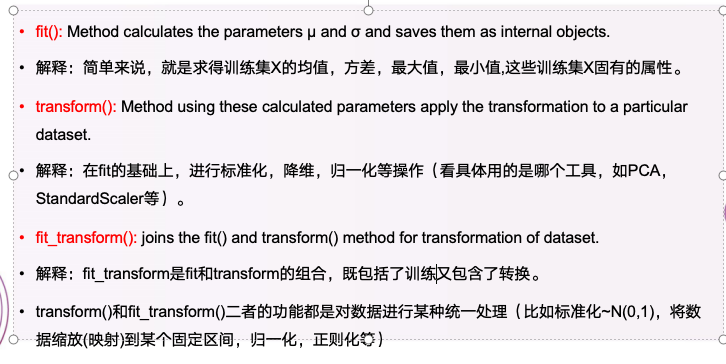

In [44]:
transfer = StandardScaler() # 实例化标准化对象
x_train = transfer.fit_transform(x_train) # 将数据进行标准化
x_test = transfer.transform(x_test)
print("标准化：",x_train)
print('标准化后的维度：',x_train.shape)

标准化： [[-0.54542492 -1.48492648 -0.58228368 ... -0.61477077 -0.59070807
  -0.26773334]
 [-0.7613765   1.81130083 -0.79768785 ... -1.36149805 -0.06100647
  -0.70797834]
 [-0.25651673 -0.14023124 -0.23246391 ...  0.22457971  0.35643001
  -0.04028247]
 ...
 [ 0.91370734  0.41373723  0.90010408 ...  1.08432844 -0.4183574
  -0.43004315]
 [ 1.90008075  0.59302993  1.83295678 ...  0.99064756 -0.44049419
  -0.89905878]
 [ 0.31254485 -0.84820754  0.2916297  ...  0.40740852  0.1050194
  -0.01585457]]
标准化后的维度： (455, 30)


### 3实现线性回归算法

In [47]:
from sklearn.metrics import mean_squared_error
estimator = SGDRegressor()# 线性回归
estimator.fit(x_train, y_train)# 使用fit方法填充数据进行训练预测
y_predict = estimator.predict(x_test) # predict方法进行测试
print(y_predict)
# <!-- 使sklearn中的均方误差函数计算误差，在回归实验中MSE较为常用。 -->
error = mean_squared_error(y_test, y_predict) # 均方误差
print(error)


[ 0.395299    0.25464018  0.93608823  0.98289033  0.37032018  0.81782775
  0.63885068 -0.04169645  0.95373617  0.87151025  1.0135899   0.90494755
  0.81567371  0.77617432 -0.06535661  0.04244983  0.4434244   0.04986968
  0.76442567  0.04214022  0.81444611  0.76639667  0.46029176  0.49713157
 -0.14042923  1.13889933  0.68225532  0.36634789  0.19601017  0.1523826
  0.43605362  1.11263574  0.82996442  0.02762485  0.83634855  0.95444811
  0.73304288  0.7012583   0.68717281  0.80595911  0.26440278  0.9847865
  0.24802649  0.6546913   0.79427019 -0.33130116  0.94520425  0.30215318
  0.82723759  0.43673309  0.18437856 -0.11041524  0.90667851  0.78590067
  0.56402961  0.80419726 -0.51316029  0.21850698  0.88862465  0.0502701
 -0.13941502  0.96103693  0.68125458  0.2010151   0.52401341  0.31241813
  1.12266276  0.76530877  0.68355663 -0.47326227  0.96778437  0.0842318
  1.16419837  1.10268932  0.37088456  0.16836272  0.9599629  -0.97184861
  0.74253777  0.30758342  1.02242626  0.51941215  0.476

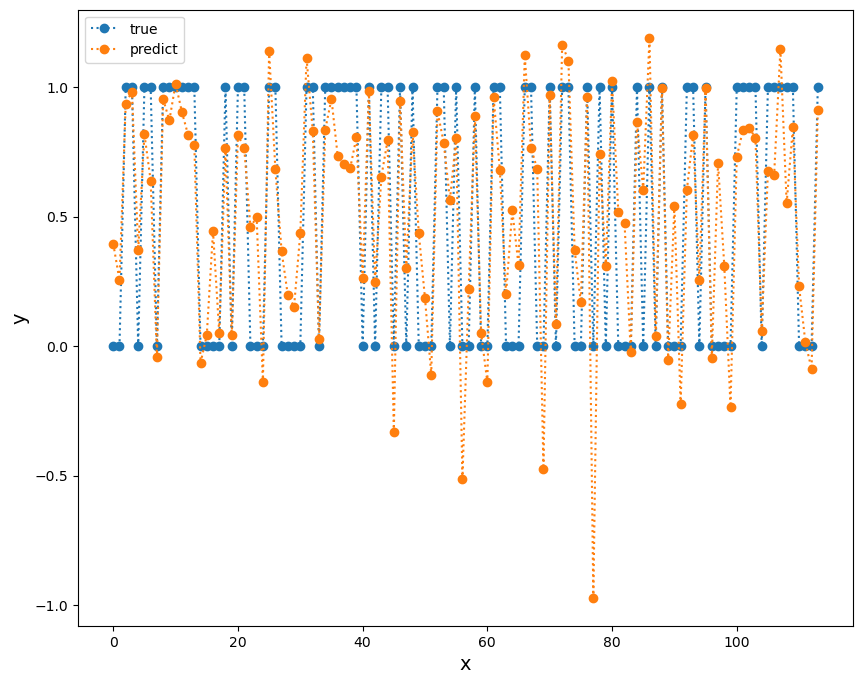

In [49]:
# 可视化结果进行查看。
# 使用matplotlib进行可视化来查看预测结和只是结果的差异性
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.xlabel("x",fontsize=14)
plt.ylabel("y", fontsize=14)
plt.plot([i for i in range(len(y_test))], y_test,linestyle=':', marker='o' ,label="true")
plt.plot([i for i in range(len(y_test))], y_predict, linestyle=':',marker='o' ,label="predict")
plt.legend()
plt.show()


## 逻辑回归

In [50]:
from sklearn.model_selection import train_test_split #划分数据集
from sklearn.linear_model import LogisticRegression # 逻辑回归
column_name = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data", names=column_name)
data = data.replace(to_replace='?', value=np.nan) # 删除缺失值
data = data.dropna()
x = data[column_name[1:10]] # 取出特征值
y = data[column_name[10]]

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 分割数据集，测试集占比30%
std = StandardScaler() # 进行标准化
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
lr = LogisticRegression() # 使用逻辑回归
lr.fit(x_train, y_train)
print("得出来的权重：", lr.coef_)
print("预测的类别：", lr.predict(x_test)) 
print("预测的准确率:", lr.score(x_test, y_test))

得出来的权重： [[ 1.42224623  0.07928925  0.09471751  1.12797609 -0.20579129  1.70169444
   1.20240287  1.26189617  0.95740668]]
预测的类别： [4 2 2 2 4 2 4 2 4 4 4 2 2 2 4 2 2 4 2 4 4 2 2 2 4 4 2 4 2 4 4 2 2 4 2 4 2
 4 4 2 4 2 4 4 2 2 4 4 2 2 4 2 2 2 2 4 2 2 4 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2
 2 2 4 4 2 4 2 4 4 2 2 4 2 2 2 2 2 4 2 2 4 4 2 2 4 2 2 4 2 4 2 2 2 4 4 2 4
 2 2 2 2 2 2 2 2 4 2 4 4 2 4 2 2 2 2 4 4 2 2 2 4 2 4 2 2 2 4 4 4 2 4 2 4 2
 2 2 2 4 2 2 4 2 4 2 4 4 4 2 2 2 2 2 2 2 2 4 2 4 4 2 4 4 4 4 2 2 4 2 2 4 2
 2 4 2 2 4 4 2 2 2 4 2 4 2 4 2 2 2 2 2 2]
预测的准确率: 0.9414634146341463


使用KNN算法实现鸢尾花种类预测,鸢尾花数据集：数据集内包含 3 类共 150 条记录，每类各 50 个数据，每条记录都有 4 项特征：花萼长度、花萼宽度、花瓣长度、花瓣宽度，可以通过这4个特征预测鸢尾花卉属于（iris-setosa, iris-versicolour, iris-virginica）中的哪一品种。


In [52]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris() # 加载数据集
# x_train,x_test,y_train,y_test为训练集特征值、测试集特征值、训练集目标值、测试集目标值
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=22)
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [53]:
# 实例化KNN分类器
estimator = KNeighborsClassifier(n_neighbors=9)
estimator.fit(x_train, y_train)
print(estimator)
# 模型评估
y_predict = estimator.predict(x_test)
print("预测结果为:\n", y_predict)
print("比对真实值和预测值：\n", y_predict == y_test)
score = estimator.score(x_test, y_test)
print("准确率为：\n", score)

KNeighborsClassifier(n_neighbors=9)
预测结果为:
 [0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 2]
比对真实值和预测值：
 [ True  True  True  True  True  True  True False  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]
准确率为：
 0.9333333333333333


### 使用决策树算法实现泰坦尼克号乘客生存预测

In [74]:
from sklearn.tree import DecisionTreeClassifier
titan = pd.read_csv("W5Titan.csv")
print(type(titan))
print(titan.head(2))
try:
    x = titan['Pclass', 'Age', 'Sex']
except:
    print('wrongly read data\n')
x = titan[['Pclass', 'Age', 'Sex']]
x

<class 'pandas.core.frame.DataFrame'>
   PassengerId Pclass                                               Name  \
1            0      3                            Braund, Mr. Owen Harris   
2            1      1  Cumings, Mrs. John Bradley (Florence Briggs Th...   

      Sex   Age  SibSp Parch     Ticket     Fare Cabin Embarked  
1    male  22.0      1     0  A/5 21171     7.25   NaN        S  
2  female  38.0      1     0   PC 17599  71.2833   C85        C  
wrongly read data



,Pclass,Age,Sex
1,3,22.0,male
2,1,38.0,female
3,3,26.0,female
4,1,35.0,female
5,3,35.0,male
...,...,...,...
1305,"Spector, Mr. Woolf",0.0,NaN
1306,"Oliva y Ocana, Dona. Fermina",0.0,39
1307,"Saether, Mr. Simon Sivertsen",0.0,38.5
1308,"Ware, Mr. Frederick",0.0,NaN


In [80]:
y = titan['Ticket']
y

1              A/5 21171
2               PC 17599
3       STON/O2. 3101282
4                 113803
5                 373450
              ...       
1305                8.05
1306               108.9
1307                7.25
1308                8.05
1309             22.3583
Name: Ticket, Length: 1309, dtype: object

In [82]:
# 缺失值需要处理，将特征当中有类别的这些特征进行字典特征抽取
x['Age'].fillna(x['Age'].mean(), inplace  = True)
# 对于x转换成字典数据x.to_dict(orient="records")

1       22.0
2       38.0
3       26.0
4       35.0
5       35.0
        ... 
1305     0.0
1306     0.0
1307     0.0
1308     0.0
1309     1.0
Name: Age, Length: 1309, dtype: float64